# 1. Importing Libraries and Loading Data


In [1]:
# Importing necessary libraries
import pandas as pd


In [2]:
# Loading the dataset
data = pd.read_csv('Covid_19_data.csv')


In [3]:
# Display the first 5 rows of the dataset
data.head()


,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


# 2. Basic Data Overview
 **Checking for Missing Values**

In [4]:
# Count the total entries in each column
data.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [5]:
# Check for null values in the dataset
data.isnull()

,Date,State,Region,Confirmed,Deaths,Recovered
0,False,True,False,False,False,False
1,False,True,False,False,False,False
2,False,True,False,False,False,False
3,False,True,False,False,False,False
4,False,True,False,False,False,False
...,...,...,...,...,...,...
316,False,False,False,False,False,False
317,False,False,False,False,False,False
318,False,False,False,False,False,False
319,False,False,False,False,False,False


In [6]:
# Summarize the missing values for each column
data.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

# Visualizing Missing Data

In [7]:
# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\SHUBHAM\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


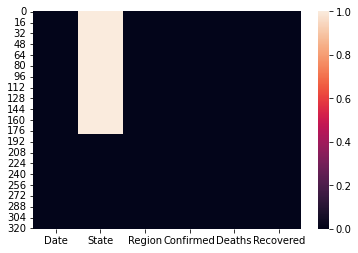

In [8]:
# Visualize missing values using a heatmap
sns.heatmap(data.isnull())
plt.show()

# 3. Data Analysis


**Show the Number of Confirmed, Deaths, and Recovered Cases in Each Region**

In [9]:
# Group data by 'Region' and calculate the sum for each numeric column
data.groupby('Region').sum()

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
...,...,...,...
West Bank and Gaza,344,2,71
Western Sahara,6,0,5
Yemen,6,0,1


**Region with Maximum Confirmed Cases**

In [10]:
# Find the top 5 regions with the highest confirmed cases
data.groupby('Region').Confirmed.sum().sort_values(ascending=False).head(5)


Region
US        1039909
Spain      236899
Italy      203591
France     166543
UK         166441
Name: Confirmed, dtype: int64

**Region with Minimum Deaths**


In [11]:
data.groupby('Region').Deaths.sum()

Region
Afghanistan            60
Albania                30
Algeria               444
Andorra                42
Angola                  2
                     ... 
West Bank and Gaza      2
Western Sahara          0
Yemen                   0
Zambia                  3
Zimbabwe                4
Name: Deaths, Length: 187, dtype: int64

In [12]:
# Find the top 50 regions with the least number of deaths
data.groupby('Region').Deaths.sum().sort_values(ascending=True).head(50)


Region
Laos                                0
Mongolia                            0
Mozambique                          0
Cambodia                            0
Fiji                                0
Namibia                             0
Nepal                               0
Madagascar                          0
Macau                               0
Papua New Guinea                    0
Rwanda                              0
Saint Kitts and Nevis               0
Bhutan                              0
Dominica                            0
Central African Republic            0
Saint Lucia                         0
Holy See                            0
Sao Tome and Principe               0
Yemen                               0
Western Sahara                      0
Eritrea                             0
Vietnam                             0
Saint Vincent and the Grenadines    0
Timor-Leste                         0
Uganda                              0
Grenada                             0
South

# 4. Data Cleaning

**Remove Records Where Confirmed Cases Are Less Than 10** 


In [13]:
# Filter records where confirmed cases are less than 10
data[data.Confirmed < 10]

,Date,State,Region,Confirmed,Deaths,Recovered
18,4/29/2020,NaN,Bhutan,7,0,5
98,4/29/2020,NaN,MS Zaandam,9,2,0
105,4/29/2020,NaN,Mauritania,8,1,6
126,4/29/2020,NaN,Papua New Guinea,8,0,0
140,4/29/2020,NaN,Sao Tome and Principe,8,0,4
177,4/29/2020,NaN,Western Sahara,6,0,5
178,4/29/2020,NaN,Yemen,6,0,1
184,4/29/2020,Anguilla,UK,3,0,3
192,4/29/2020,"Bonaire, Sint Eustatius and Saba",Netherlands,5,0,0
194,4/29/2020,British Virgin Islands,UK,6,1,3


In [14]:
# Uncomment the below line to remove such records from the dataset
# data = data[~(data.Confirmed < 10 )]

# 5. COVID-19 Statistics for India

In [15]:
# Filter data to show COVID-19 statistics for India
data[data.Region == 'India']

,Date,State,Region,Confirmed,Deaths,Recovered
74,4/29/2020,NaN,India,33062,1079,8437


# 6. Sorting Data


**Sort by Number of Recovered Cases in Descending Order**


In [16]:
# Sort the dataset by the 'Recovered' column in descending order
data.sort_values(by=['Recovered'], ascending=False)


,Date,State,Region,Confirmed,Deaths,Recovered
153,4/29/2020,NaN,Spain,236899,24275,132929
285,4/29/2020,Recovered,US,0,0,120720
61,4/29/2020,NaN,Germany,161539,6467,120400
76,4/29/2020,NaN,Iran,93657,5957,73791
80,4/29/2020,NaN,Italy,203591,27682,71252
...,...,...,...,...,...,...
248,4/29/2020,Maryland,US,20849,1078,0
246,4/29/2020,Manitoba,Canada,275,6,0
243,4/29/2020,Louisiana,US,27660,1845,0
241,4/29/2020,Kentucky,US,4537,234,0


# 7. Enhanced Visualizations


**Bar Plot: Top 10 Regions by Confirmed Cases**

In [17]:
# Top 10 regions with the highest confirmed cases
top_regions = data.groupby('Region').Confirmed.sum().sort_values(ascending=False).head(10)

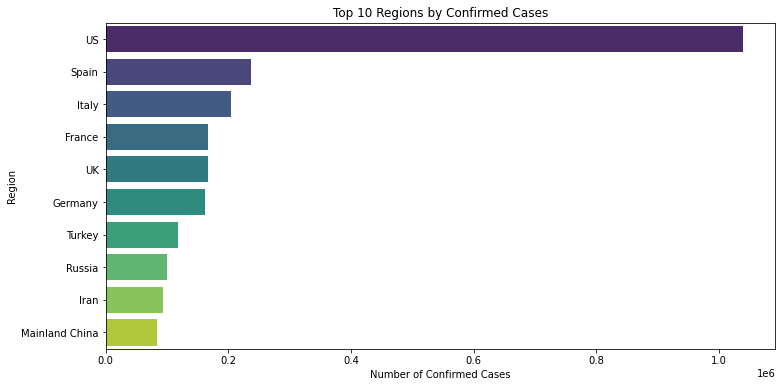

In [18]:
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_regions.values, y=top_regions.index, palette="viridis")
plt.title("Top 10 Regions by Confirmed Cases")
plt.xlabel("Number of Confirmed Cases")
plt.ylabel("Region")
plt.show()

**Pie Chart: Distribution of Total Cases by Region (Top 5)**


In [19]:
# Top 5 regions by total cases (confirmed + deaths + recovered)
total_cases = data.groupby('Region').sum()

In [20]:
# Find the top 5 regions by total cases
top_5 = total_cases[['Confirmed', 'Deaths', 'Recovered']].sum(axis=1).sort_values(ascending=False).head(5)

In [21]:
top_5

Region
US         1221596
Spain       394103
Italy       302525
Germany     288406
France      239782
dtype: int64

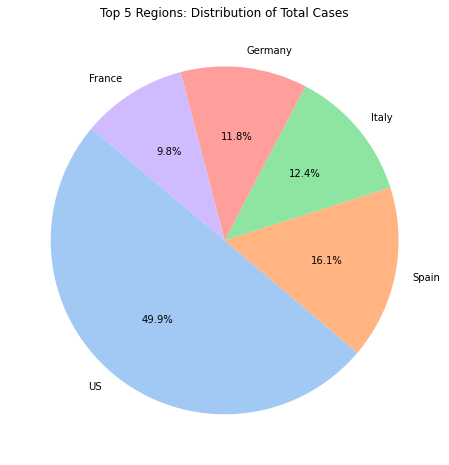

In [22]:
# Create a pie chart for the distribution of total cases among the top 5 regions
plt.figure(figsize=(8, 8))
plt.pie(top_5, labels=top_5.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Top 5 Regions: Distribution of Total Cases")
plt.show()